# Неделя 4. Понедельник

## Обучение без учителя


### Кластеризация

### Задание 1

Импортируйте несколько моделей кластеризации: 
* KMeans
* DBSCAN
* https://scikit-learn.org/stable/modules/clustering.html

In [227]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
sklearn.set_config(transform_output='pandas')

from yellowbrick.cluster import SilhouetteVisualizer

import umap
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score, rand_score

import optuna

Импортируй датасет: `path = 'aux/X_train.txt'`

* В этом файле содержатся датчики мобильного телефона для различных активностей пользователя. Необходимо выявить какие кластеры можно выделить в данных и предположить, каким состояниями они соответствуют (пользователь в покое, идет, сидит и тд.)

* Фичей много, и здесь не особо нужно, что каждая из них значит, однако более детально об эксперименте можно прочитать [тут](https://data.world/uci/human-activity-recognition)

In [5]:
path = 'aux/X_train.txt'
X_train = pd.read_csv(path, sep='\s+', header=None)
X_train

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_17428/3265598972.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv(path, sep='\s+', header=None)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


1. Примени ряд кластеризационных [моделей](https://scikit-learn.org/stable/modules/clustering.html) на импортированном датасете.

In [69]:
# code
km = KMeans(2, random_state=42)
dbs = DBSCAN(eps=4.4, min_samples=2)

km.fit(X_train)
dbs.fit(X_train)

DBSCAN(eps=4.4, min_samples=2)

2. Определи и зафиксируй количество кластеров, которое наиболее оптимально с точки зрения метрики `silhouette`. Установи библиотеку [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) и визуализируй результаты для использованных методов (при использовании метода K-means). 

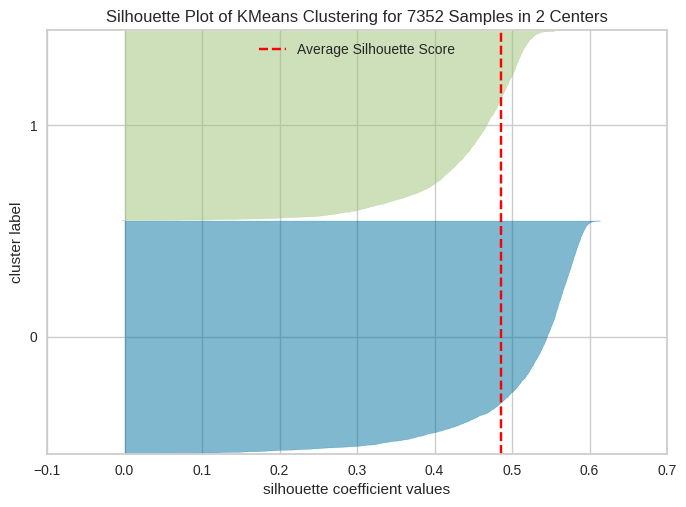

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7352 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
# code
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_train)
visualizer.show()

In [72]:
print("Sil_score of KMeans:",silhouette_score(X_train, km.labels_))
print("Sil_score of DBSCAN:",silhouette_score(X_train, dbs.labels_))

Sil_score of KMeans: 0.4851541220680405
Sil_score of DBSCAN: 0.012484534339623782


# ❓

Почему метрика `silhouette` может быть бессмысленной в некоторых случаях? Приведи пример такой ситуации. 

> Если данные содержат сложные формы, кластеры с разной плотностью и много шума.

4. Примените [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [UMAP](https://umap-learn.readthedocs.io/en/latest/) и [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) декомпозиции и визуализируйте полученные объекты в новом (двумерном или трехмерном) пространстве. В процессе перебирайте возможные параметры и сравнивайте результат по визуализациям.

In [ ]:
# code
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=30)
ump = umap.UMAP(n_components=2, n_neighbors=100)

In [99]:
X_pca = pca.fit_transform(X_train)
X_tsne = tsne.fit_transform(X_train)
X_umap = ump.fit_transform(X_train)

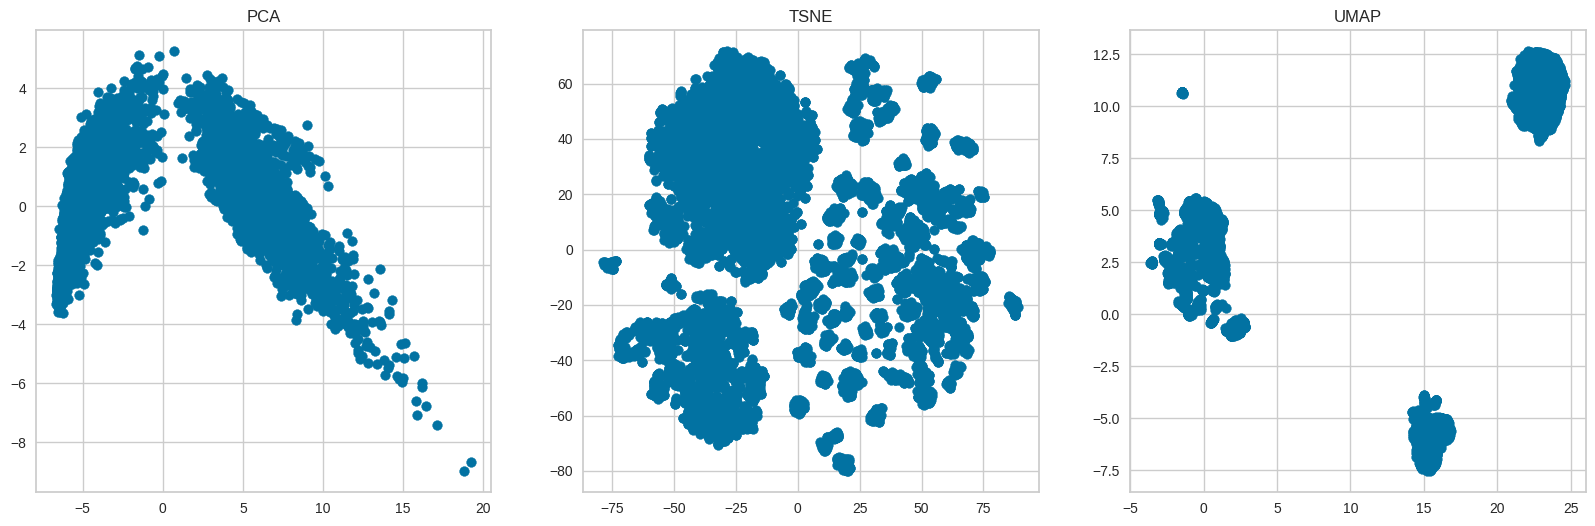

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

ax1.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1])
ax2.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1])
ax3.scatter(X_umap[:, 0], X_umap[:, 1])

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

plt.show()

5. Повтори шаги 1 и 2 для трансформированных данных. 

In [109]:
# code
X = {
    'pca'  : X_pca,
    'tsne' : X_tsne,
    'umap' : X_umap
}

models = {
    'KMeans' : KMeans(),
    'DBSCAN' : DBSCAN(eps=1)
}

In [124]:
def plot_results(X: dict, models: dict):
    fig, ax = plt.subplots(3, 2, figsize=(18, 12))
    for i in np.arange(3):
        for j in np.arange(2):
            X_ = list(X.values())[i]
            model = list(models.values())[j].fit(X_)
            sil_score = silhouette_score(X_, model.labels_)
                      
            ax[i, j].scatter(np.array(X_)[:, 0], np.array(X_)[:, 1], marker='.', s=10)
            ax[i, j].set_title(f'{list(X.keys())[i]}/{list(models.keys())[j]}: sil_score={sil_score:.3f}')

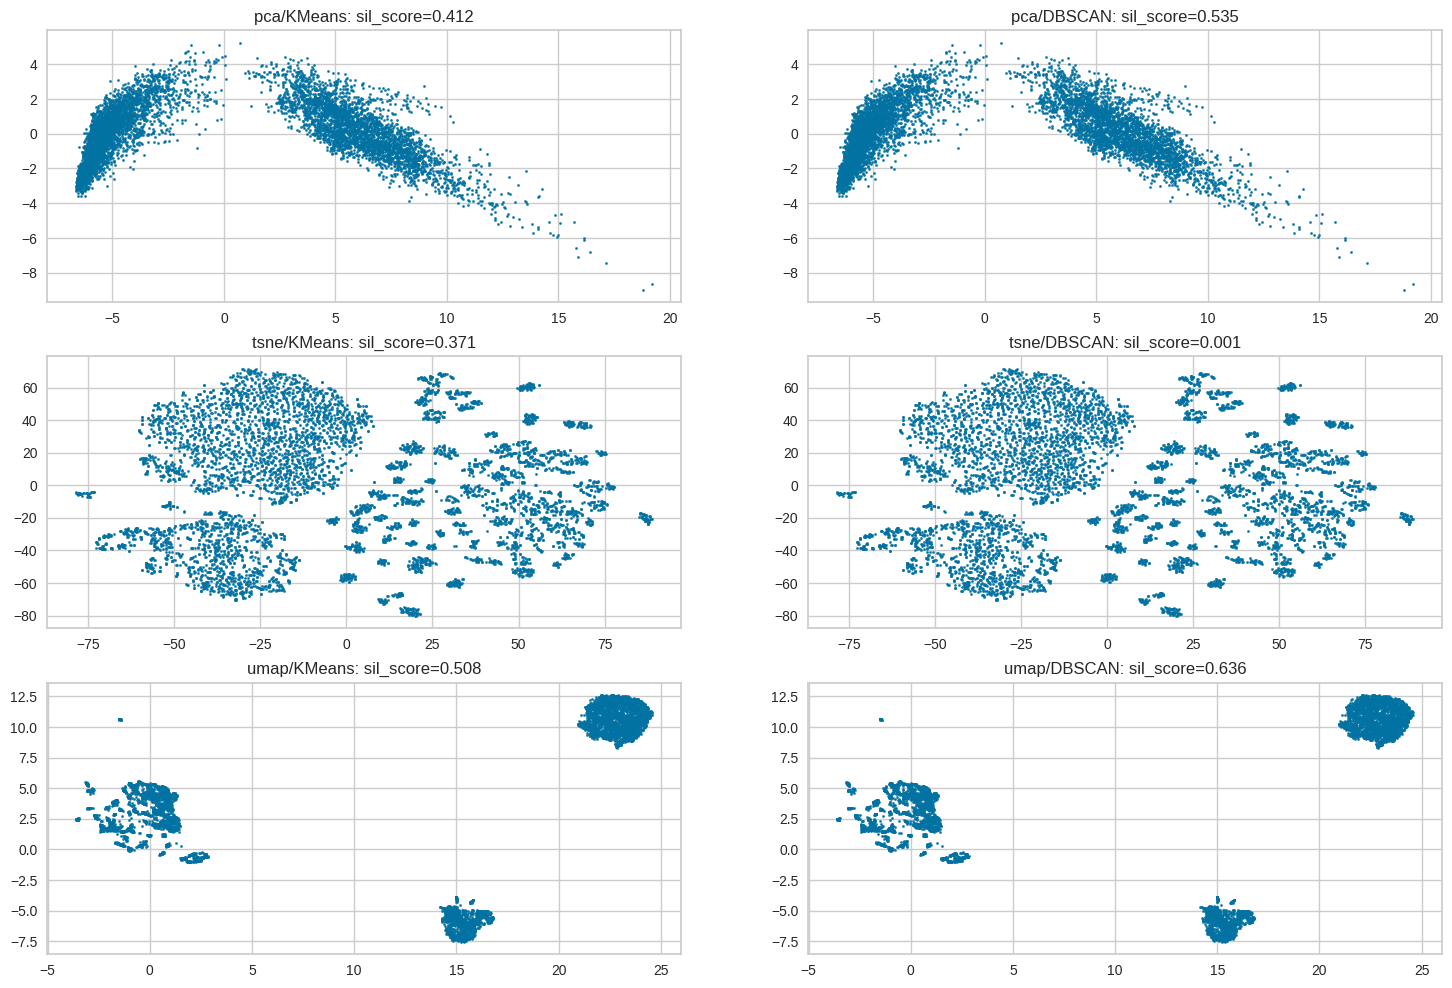

In [125]:
plot_results(X, models)

6. Сделай вывод: какой метод кластеризации и какие преобразования данных дают наилучший результат в контексте метрики силует. 

UMAP + DBSCAN

7. Визуализируй наиболее успешный результат, цветом выдели кластеры

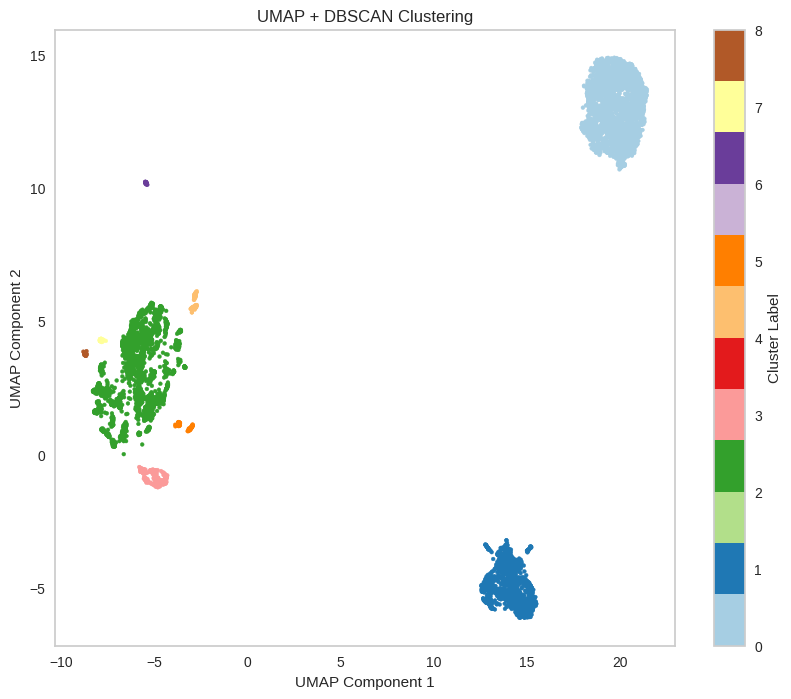

In [199]:
# code
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_umap)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=dbscan_labels, cmap='Paired', s=30, marker='.')
plt.title("UMAP + DBSCAN Clustering")
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.show()

8. Теперь настало время внешних метрик.

* Подгрузи файл `y_train.txt`. В нем разметка реальных активностей человека, [здесь](https://data.world/uci/human-activity-recognition) можно найти какой класс - какая активность.
* Посчитай внешние метрики $homogenity$ и $completeness$.
* Выбери оптимальное количество кластеров в контексте внешних метрик

In [232]:
path = 'aux/y_train.txt'
y_train = pd.read_csv(path)

y_train = np.ravel(y_train)

In [151]:
X_train = X_train.drop(index=7351)

In [ ]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=50)
ump = umap.UMAP(n_components=2, n_neighbors=73, min_dist=0.058)

In [246]:
X_pca = pca.fit_transform(X_train)
X_tsne = tsne.fit_transform(X_train)
X_umap = ump.fit_transform(X_train)

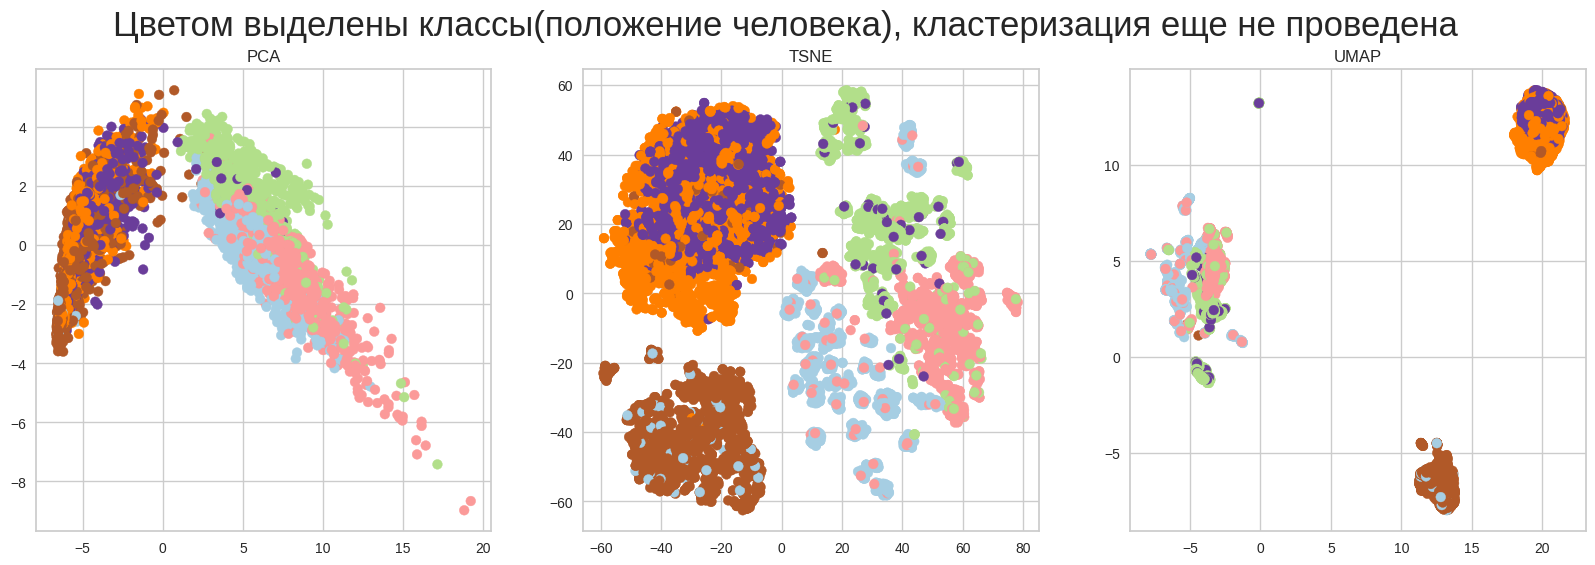

In [247]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Цветом выделены классы(положение человека), кластеризация еще не проведена', fontsize=25)
ax1.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y_train, cmap='Paired')
ax2.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], c=y_train, cmap='Paired')
ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='Paired')

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

plt.show()

In [259]:
X = {
    'pca'  : X_pca,
    'tsne' : X_tsne,
    'umap' : X_umap
}

models = {
    'KMeans' : KMeans(n_clusters=2),
    'DBSCAN' : DBSCAN(eps=1)
}

In [257]:
def plot_results(X: dict, models: dict):
    fig, ax = plt.subplots(3, 2, figsize=(12, 12))
    for i in np.arange(3):
        for j in np.arange(2):
            X_ = list(X.values())[i]
            model = list(models.values())[j].fit(X_)
            colors = model.labels_
            sil_score = silhouette_score(X_, model.labels_)           
            ax[i, j].scatter(np.array(X_)[:, 0], np.array(X_)[:, 1], c=colors, cmap='Paired', marker='.', s=10)
            ax[i, j].set_title(f'{list(X.keys())[i]}/{list(models.keys())[j]}: sil_score={sil_score:.3f}')

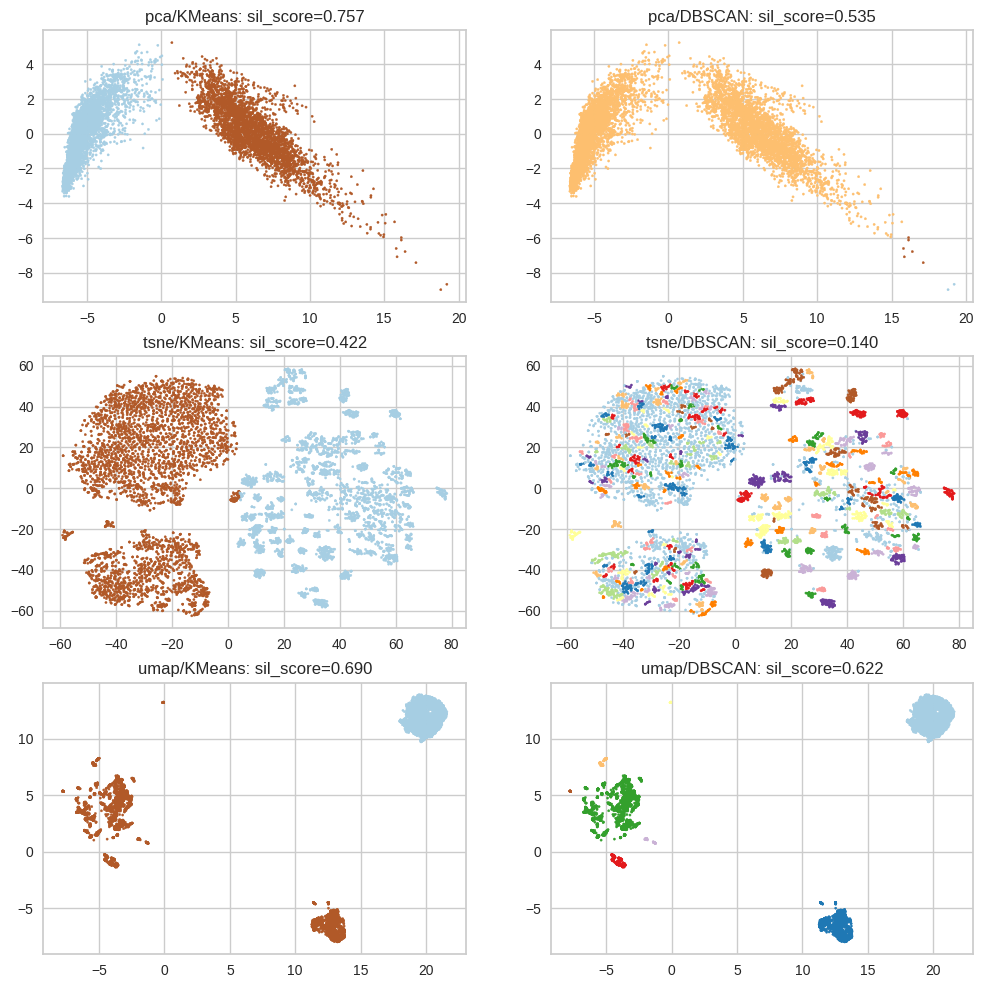

In [260]:
plot_results(X, models)

In [248]:
km = KMeans(n_clusters=2)
dbs = DBSCAN(eps=13.8, min_samples=32)

km.fit(X_umap)
dbs.fit(X_umap)

labelKM = km.labels_
labelDBS = dbs.labels_

In [249]:
homogeneity_score(y_train, labelKM), completeness_score(y_train, labelKM), rand_score(y_train, labelKM)

(0.35516943733190437, 0.9214700946073562, 0.6555036521478405)

In [250]:
homogeneity_score(y_train, labelDBS), completeness_score(y_train, labelDBS), rand_score(y_train, labelDBS)

(0.3345832882539066, 0.9126111621991924, 0.621519993114917)

In [244]:
def objective(trial):
    # Определение гиперпараметров для оптимизации
    n_neighbors = trial.suggest_int("n_neighbors", 2, 100)  # Количество соседей
    min_dist = trial.suggest_float("min_dist", 0.0, 1)    # Минимальное расстояние между точками

    # Применение UMAP для понижения размерности
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2)
    X_umap = umap_model.fit_transform(X_train)
    eps = trial.suggest_float("eps", 0.01, 100)  # Дистанция
    min_samples = trial.suggest_int("min_samples", 1, 100)  # Минимальное количество точек в кластере

    # Обучение модели DBSCAN
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_umap)

    # Пропустим метрики, если модель не нашла ни одного кластера
    if len(set(labels)) <= 1:  # Если все точки в одном кластере или выбросы
        return 0.0  # Возвращаем 0 как низкий результат

    # Вычисление метрик
    homogeneity = homogeneity_score(y_train, labels)
    completeness = completeness_score(y_train, labels)
    rand = rand_score(y_train, labels)

    # Максимизация средних значений метрик
    return (homogeneity + completeness + rand) / 3

# Создание и запуск исследования Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Получение лучших параметров
print("Best parameters: ", study.best_params)
print("Best value: ", study.best_value)

[I 2024-11-04 18:18:00,114] A new study created in memory with name: no-name-e39252ed-f820-4503-8ba3-cb462c5f8cf3
[I 2024-11-04 18:18:09,548] Trial 0 finished with value: 0.0 and parameters: {'n_neighbors': 81, 'min_dist': 0.1596428029269491, 'eps': 28.377101375848508, 'min_samples': 66}. Best is trial 0 with value: 0.0.
[I 2024-11-04 18:18:18,907] Trial 1 finished with value: 0.0 and parameters: {'n_neighbors': 83, 'min_dist': 0.6559821214238074, 'eps': 68.16570513800265, 'min_samples': 23}. Best is trial 0 with value: 0.0.
[I 2024-11-04 18:18:28,627] Trial 2 finished with value: 0.0 and parameters: {'n_neighbors': 93, 'min_dist': 0.09518116598129045, 'eps': 85.76810601641087, 'min_samples': 44}. Best is trial 0 with value: 0.0.
[I 2024-11-04 18:18:37,087] Trial 3 finished with value: 0.0 and parameters: {'n_neighbors': 77, 'min_dist': 0.3800907152773241, 'eps': 44.158204991879245, 'min_samples': 38}. Best is trial 0 with value: 0.0.
[I 2024-11-04 18:18:46,996] Trial 4 finished with v

Best parameters:  {'n_neighbors': 73, 'min_dist': 0.05821386312768199, 'eps': 13.868818268080151, 'min_samples': 32}
Best value:  0.7488104647826278


In [ ]:
km = KMeans(n_clusters=2)
dbs = DBSCAN(eps=12.3, min_samples=41)

km.fit(X_umap)
dbs.fit(X_umap)

labelKM = km.labels_
labelDBS = dbs.labels_

In [263]:
homogeneity_score(y_train, labelKM), completeness_score(y_train, labelKM), rand_score(y_train, labelKM)

(0.35516943733190437, 0.9214700946073562, 0.6555036521478405)

In [262]:
homogeneity_score(y_train, labelDBS), completeness_score(y_train, labelDBS), rand_score(y_train, labelDBS)

(0.5375777548489041, 0.9182816778410571, 0.7890258440473182)

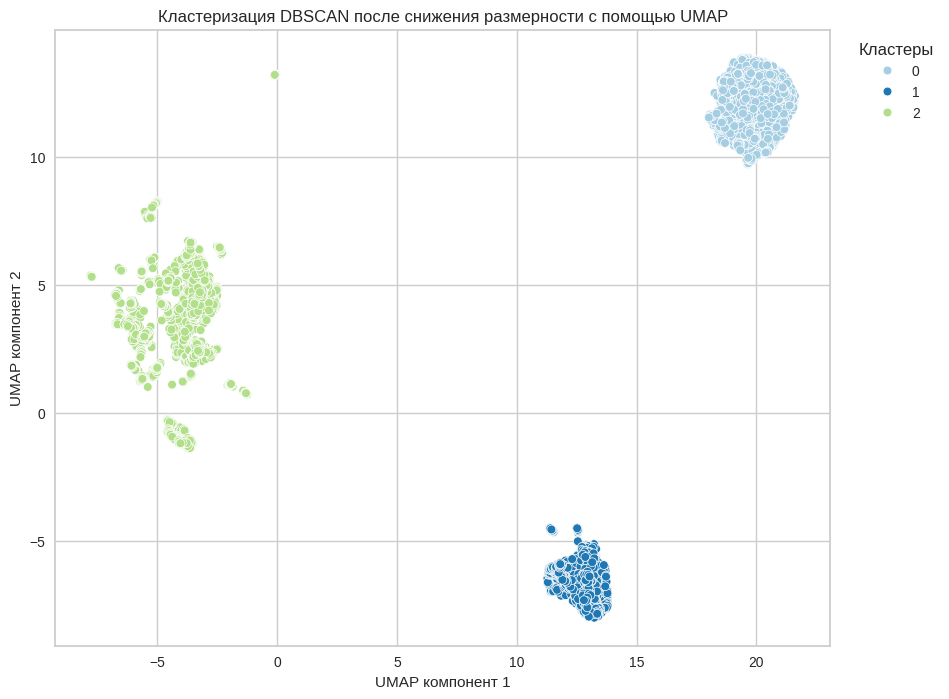

array([0, 1, 2])

In [ ]:
labels = dbs.fit_predict(X_umap)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='Paired', s=40)
plt.title("Кластеризация DBSCAN после снижения размерности с помощью UMAP")
plt.xlabel("UMAP компонент 1")
plt.ylabel("UMAP компонент 2")
plt.legend(title="Кластеры", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора закоммить изменения в файле. Сделай это с сообщением: 
`"Clustering: task 1 finished"`

После коммита выполни `!git status` в ячейке ниже. 

In [ ]:
# code 

### Задание 2

Скачай с kaggle [датасет](https://www.kaggle.com/arjunbhasin2013/ccdata) с информацией об обладателях кредитных карт. Кластеризируй объекты и проанализируй результат. 

In [ ]:
# code

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сделай пуш на __github__. 